In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df=pd.read_csv('train.csv')
df.head()

,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,1992,12,13,-4.99,156.0,4.8,-2.8,78.5,28.98,30.06
1,1989,5,14,0.00,-110.1,-2.5,2.4,NaN,24.95,25.23
2,1993,6,28,2.04,-110.2,-4.5,5.9,NaN,25.78,27.84
3,1995,1,8,1.98,-140.0,-7.7,1.2,82.6,26.47,26.86
4,1995,2,21,5.01,-170.0,-5.4,-6.6,75.2,28.83,28.90


In [51]:
df_test=pd.read_csv('evaluation.csv')
df_1997=pd.read_csv('data_1997_1998.csv')
print(df_test.shape)
print(df_1997.shape)

(26103, 10)
(32314, 10)


Observation 1 :predicted data from evaluation.csv can be used for 1997-1998 prediction if model performs well.

In [52]:
df.shape

(104409, 10)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104409 entries, 0 to 104408
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       104409 non-null  int64  
 1   month      104409 non-null  int64  
 2   day        104409 non-null  int64  
 3   latitude   104409 non-null  float64
 4   longitude  104409 non-null  float64
 5   zon.winds  89839 non-null   float64
 6   mer.winds  89839 non-null   float64
 7   humidity   65615 non-null   float64
 8   air temp.  96571 non-null   float64
 9   s.s.temp.  104409 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 8.0 MB


In [54]:
df.isnull().sum()

year             0
month            0
day              0
latitude         0
longitude        0
zon.winds    14570
mer.winds    14570
humidity     38794
air temp.     7838
s.s.temp.        0
dtype: int64

Observation 2: Lot of Null values in humidity in particular. others can be solved by imputer
<br>Ideas- use interpolation ex-take mean of nearby 10 data points and impute 
<br>For humidity we can try training xgboost and if performance is good we can use na values as test dataset

In [55]:
#sort the data chronologically
df['date']=pd.to_datetime(df[['year','month','day']])
df=df.sort_values(by='date').reset_index(drop=True)
df.head()

,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.,date
0,1980,3,8,-0.02,-109.44,-4.9,1.1,NaN,25.66,25.97,1980-03-08
1,1980,3,9,-0.02,-109.44,-4.5,2.2,NaN,25.69,25.28,1980-03-09
2,1980,3,10,-0.02,-109.44,-3.8,1.9,NaN,25.56,24.31,1980-03-10
3,1980,3,12,-0.02,-109.44,-4.4,0.3,NaN,24.72,23.64,1980-03-12
4,1980,3,13,-0.02,-109.44,-3.2,0.1,NaN,24.66,24.34,1980-03-13


In [56]:
df['year'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996], dtype=int64)

In [57]:
#add another feature indicating ellapsed time
df = df.sort_values(by='date').reset_index(drop=True)
df['time_elapsed'] = (df['date'] - df['date'].min()).dt.days
df.drop(columns=['date'],inplace=True)

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


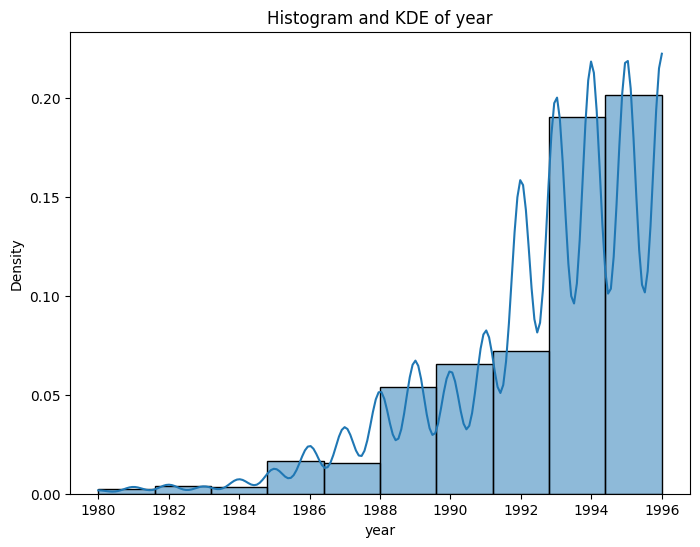

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


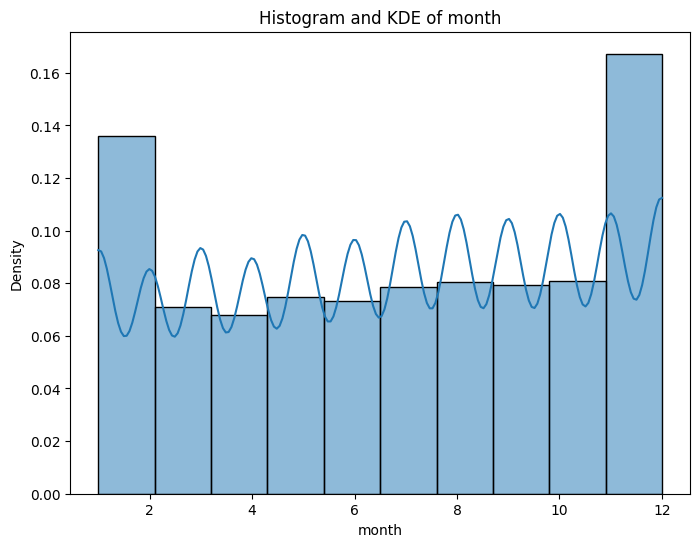

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


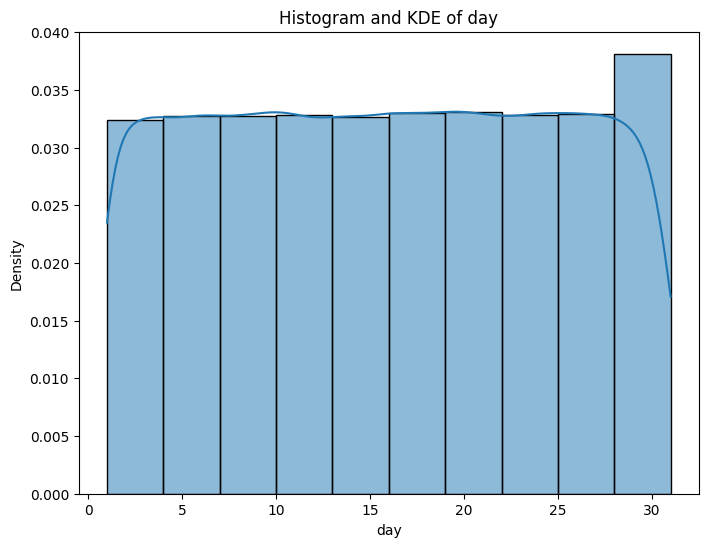

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


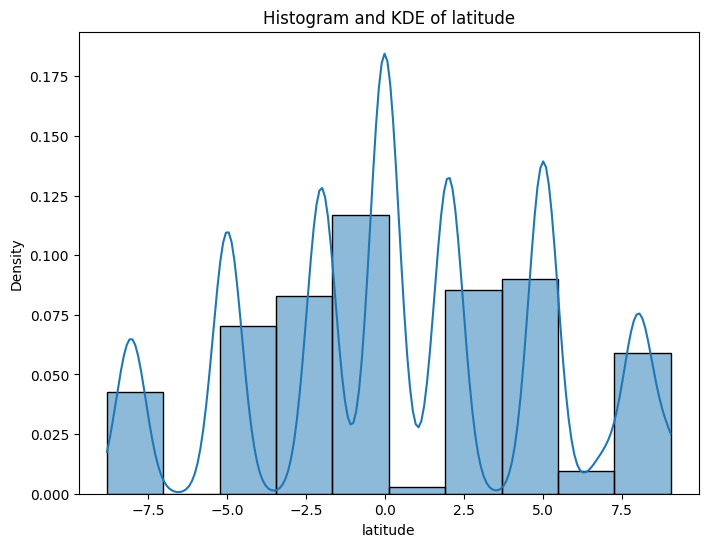

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


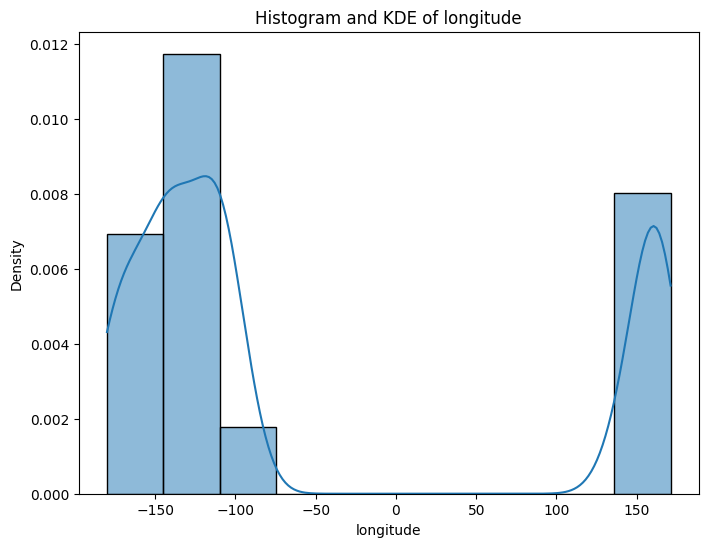

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


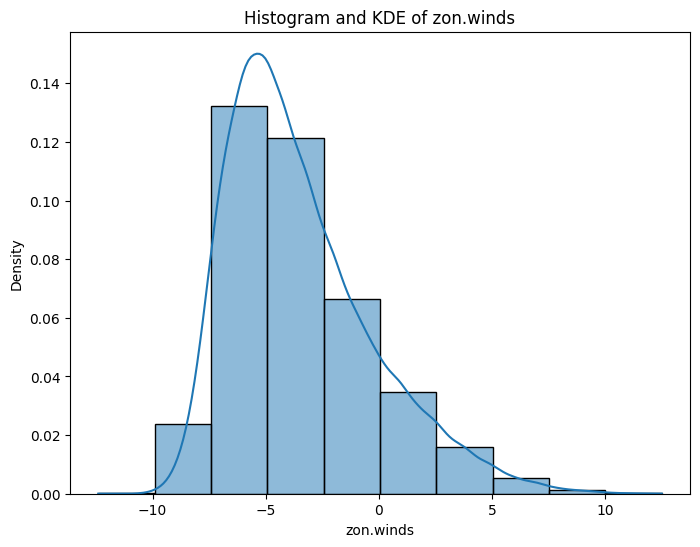

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


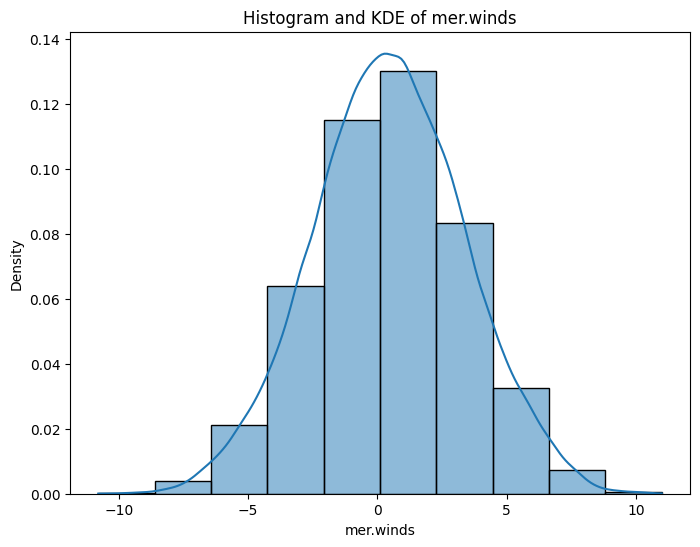

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


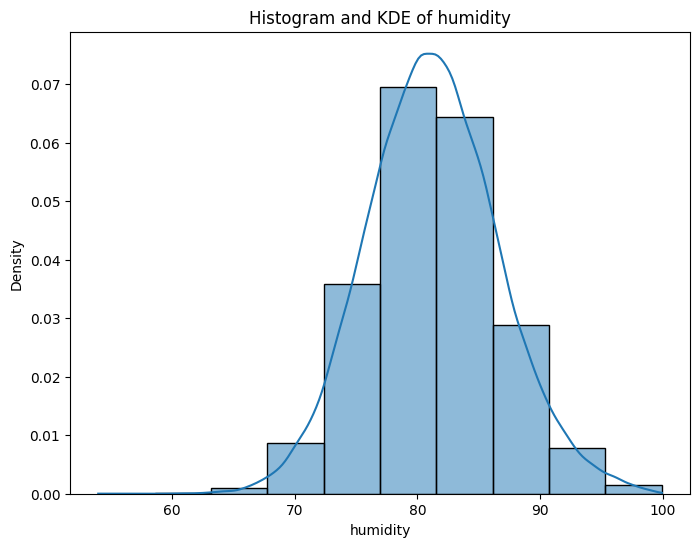

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


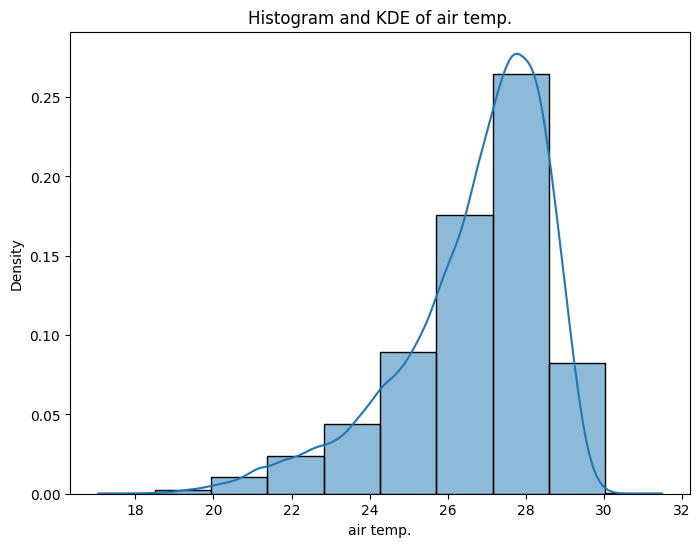

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


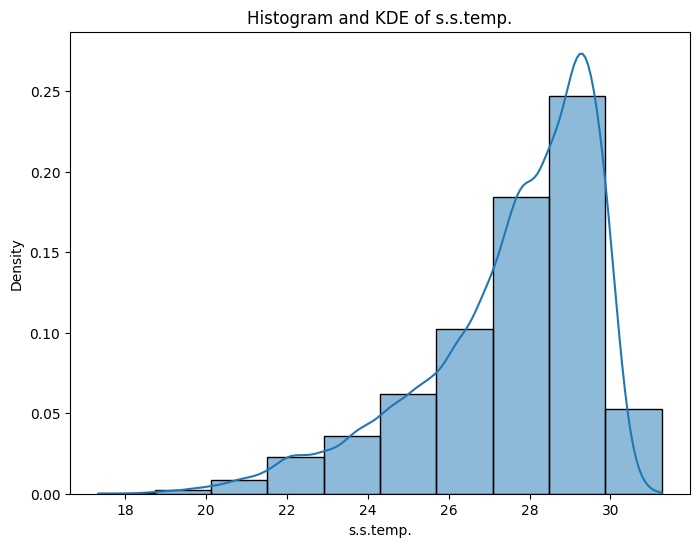

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


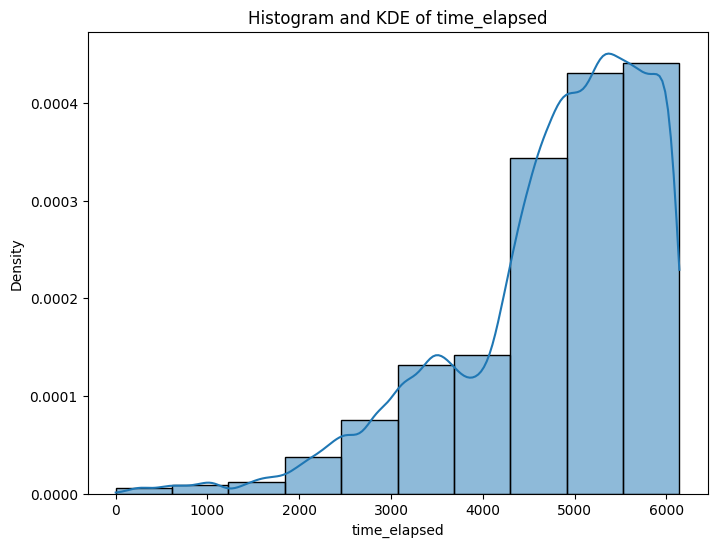

In [58]:
# Univariate Analysis

for column in df.columns:
    plt.figure(figsize=(8, 6))
    
    # Histogram with KDE
    sns.histplot(df[column].dropna(), bins=10, kde=True, edgecolor='black', stat='density')
    
    plt.title(f'Histogram and KDE of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    
    plt.show()

Observation 3: More data was recorded in the final years and very less during the initial stages

In [59]:
'''# Handling null values
null_features = ['humidity', 'mer.winds', 'zon.winds', 'air temp.']
num_features = len(null_features)
num_rows = num_features // 2 if num_features % 2 == 0 else num_features // 2 + 1

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 8))

for i, feature in enumerate(null_features):
    row = i // 2
    col = i % 2
    sns.lineplot(x='time_elapsed', y=df[feature].isnull(), ax=axes[row, col], data=df)
    axes[row, col].set_title(f'Null Values of {feature} over Elapsed Time')
    axes[row, col].set_xlabel('Elapsed Time (days)')
    axes[row, col].set_ylabel('Number of Null Values')
    axes[row, col].grid(True)

# Hide the empty subplot if the number of features is odd
if num_features % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

plt.tight_layout()
plt.show()'''


"# Handling null values\nnull_features = ['humidity', 'mer.winds', 'zon.winds', 'air temp.']\nnum_features = len(null_features)\nnum_rows = num_features // 2 if num_features % 2 == 0 else num_features // 2 + 1\n\nfig, axes = plt.subplots(num_rows, 2, figsize=(12, 8))\n\nfor i, feature in enumerate(null_features):\n    row = i // 2\n    col = i % 2\n    sns.lineplot(x='time_elapsed', y=df[feature].isnull(), ax=axes[row, col], data=df)\n    axes[row, col].set_title(f'Null Values of {feature} over Elapsed Time')\n    axes[row, col].set_xlabel('Elapsed Time (days)')\n    axes[row, col].set_ylabel('Number of Null Values')\n    axes[row, col].grid(True)\n\n# Hide the empty subplot if the number of features is odd\nif num_features % 2 != 0:\n    fig.delaxes(axes[num_rows - 1, 1])\n\nplt.tight_layout()\nplt.show()"

Observation 4: More null values present in humidity at the beginning and then it decreases with time whereas others are random

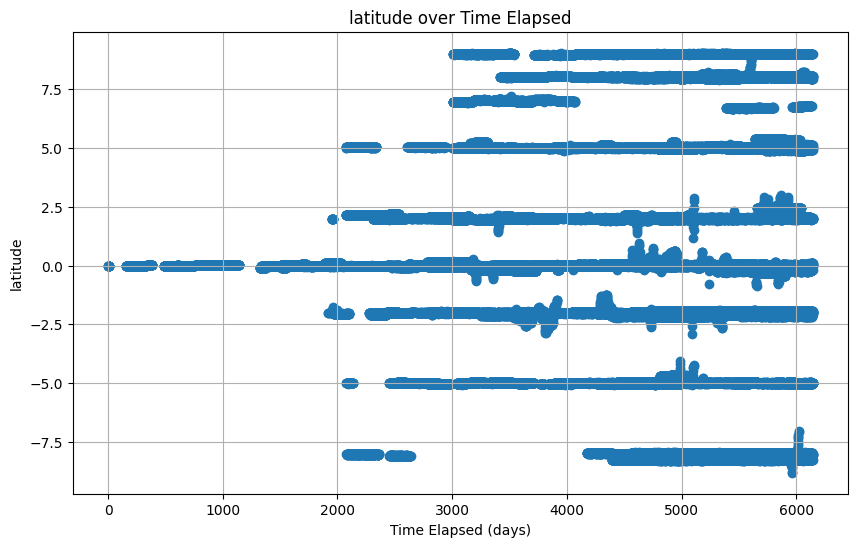

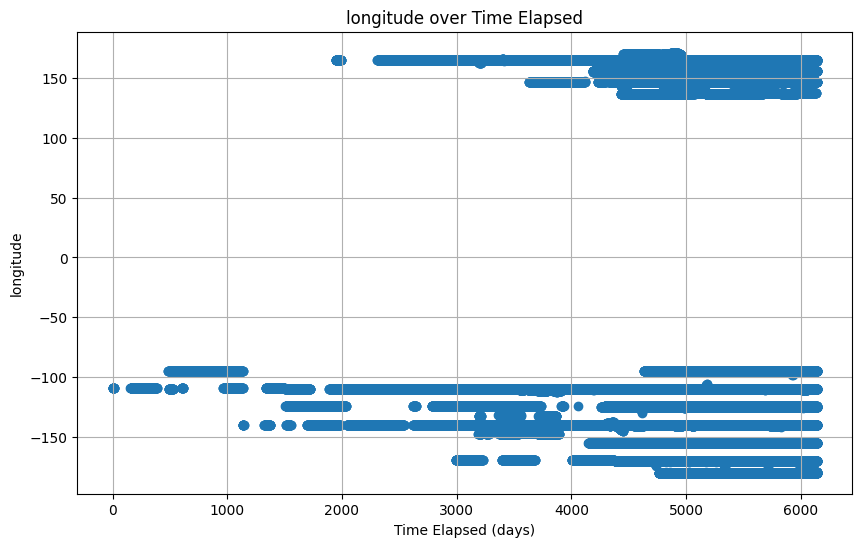

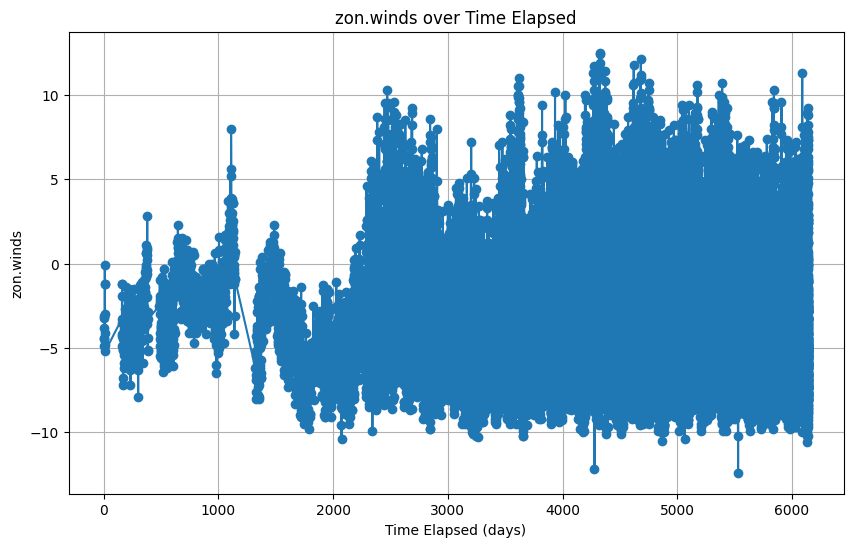

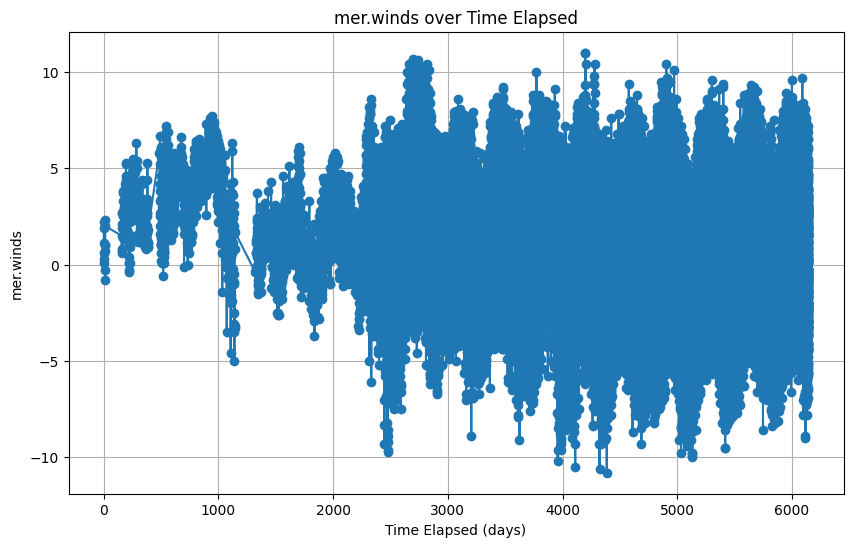

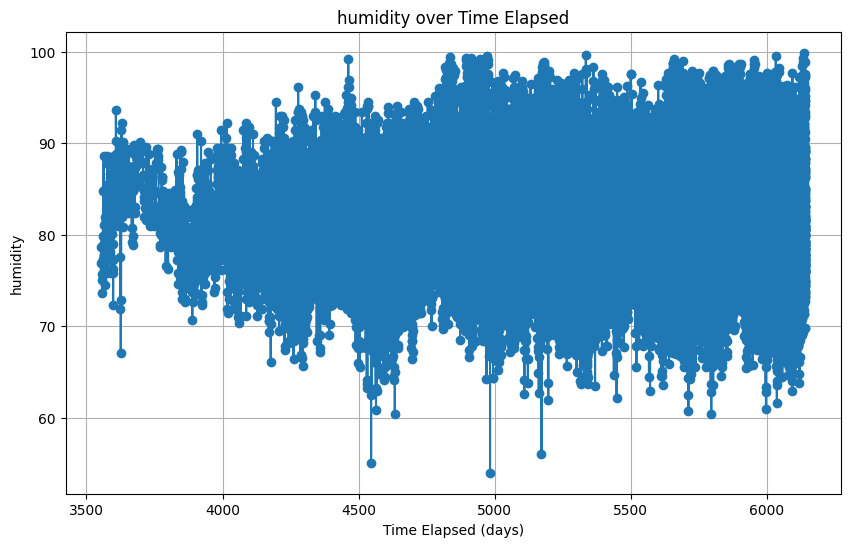

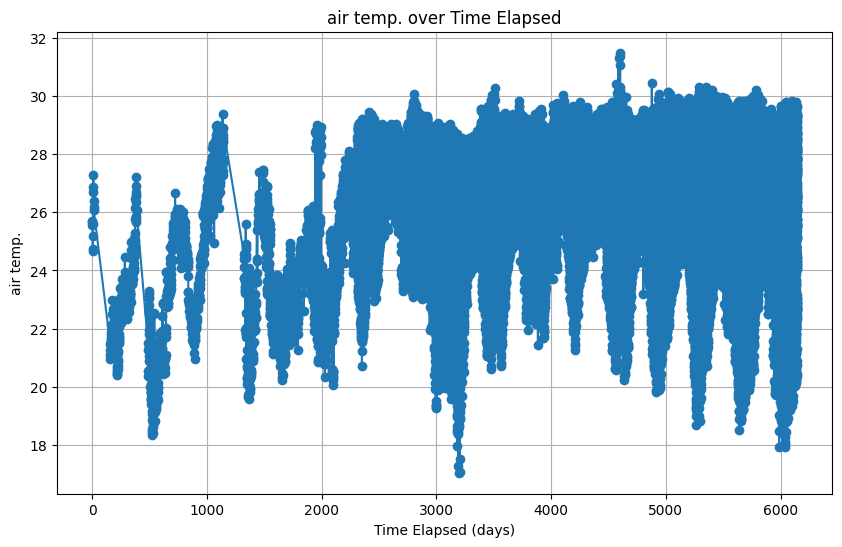

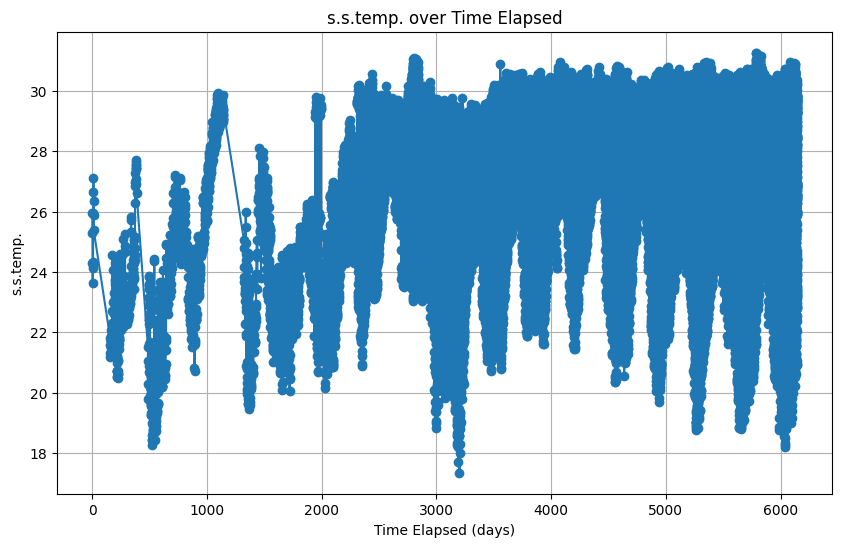

In [60]:
# Understanding how data changes with time and seasonal patterns

for column in df.columns:
    if column not in ['year', 'month', 'day', 'time_elapsed']:
        plt.figure(figsize=(10, 6))
        if column in ['latitude', 'longitude']:
            plt.scatter(df['time_elapsed'].dropna(), df[column].dropna())  # Corrected scatter plot
        else:
            # Align indices of time_elapsed and column
            aligned_df = df[['time_elapsed', column]].dropna()
            plt.plot(aligned_df['time_elapsed'], aligned_df[column], marker='o')  # Corrected line plot
        plt.title(f'{column} over Time Elapsed')
        plt.xlabel('Time Elapsed (days)')
        plt.ylabel(column)
        plt.grid(True)
        plt.show()


In [61]:
# List of features to interpolate
features_to_interpolate = ['air temp.', 'zon.winds', 'mer.winds']

# Apply spline interpolation to each feature
for feature in features_to_interpolate:
    df[feature] = df[feature].interpolate(method='spline', order=3)

# Check if there are any remaining missing values
missing_values_count = df[features_to_interpolate].isnull().sum()
print("Remaining missing values after interpolation:\n", missing_values_count)


Remaining missing values after interpolation:
 air temp.    0
zon.winds    0
mer.winds    0
dtype: int64


In [62]:
from sklearn.model_selection import train_test_split,GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into two sets: one with NaN values and one without
df_known = df.dropna(subset=['humidity'])  # DataFrame without NaN values
df_nan = df[df['humidity'].isna()]         # DataFrame with NaN values

# Features and target variable
X = df_known[['month', 'year','time_elapsed','s.s.temp.','latitude','longitude','air temp.']]
y = df_known['humidity']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

param_grid = {
    'n_estimators': [400, 500, 600],  # Number of trees
    'max_depth': [7, 9, 11],           # Maximum depth of each tree
    'learning_rate': [0.5, 0.1, 0.5], # Learning rate
    'subsample': [0.7, 0.9, 1.1],      # Subsample ratio of the training instances
    'colsample_bytree': [0.9, 1.0, 2.0],# Subsample ratio of columns when constructing each tree
}

# Create the XGBoost regressor
model = XGBRegressor()

# Instantiate the grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters found during grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Model evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
675 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
  File "c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\xgboost\sklearn.py", line 1090, in fit
    self._Booster = train(

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500, 'subsample': 0.9}
Root Mean Squared Error (RMSE): 2.5618433006040653
R-squared: 0.7702888247689389


In [63]:
# Satisfied with performance so use it on Null values
imputed_humidity = best_model.predict(df_nan[['month', 'year','time_elapsed','s.s.temp.','latitude','longitude','air temp.']])
df.loc[df['humidity'].isna(), 'humidity'] = imputed_humidity

In [64]:
df.isnull().sum()

year            0
month           0
day             0
latitude        0
longitude       0
zon.winds       0
mer.winds       0
humidity        0
air temp.       0
s.s.temp.       0
time_elapsed    0
dtype: int64

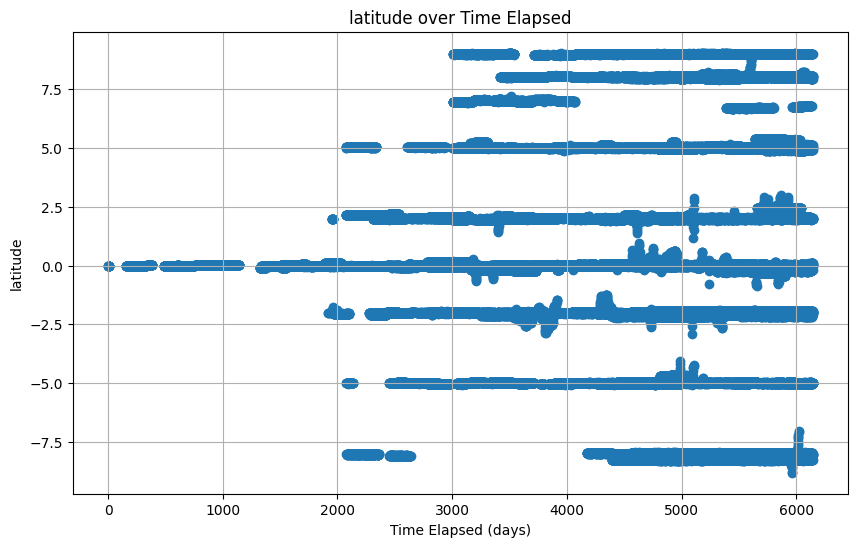

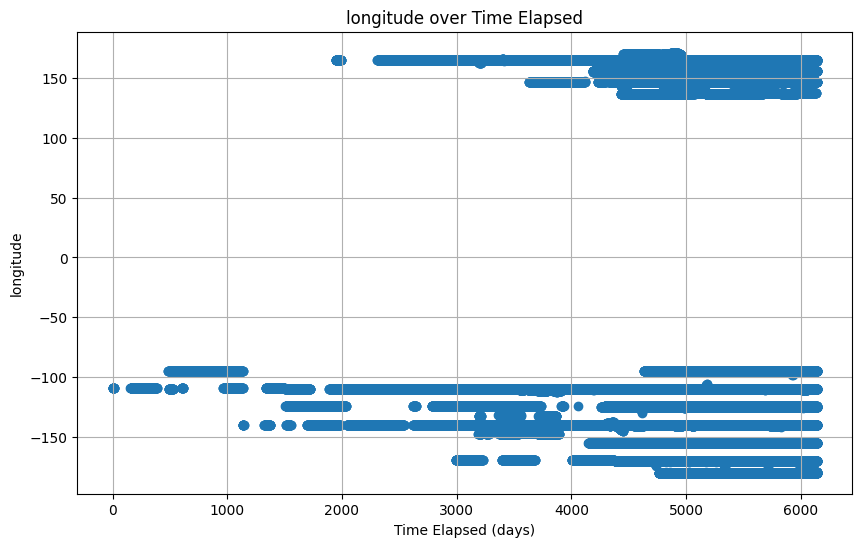

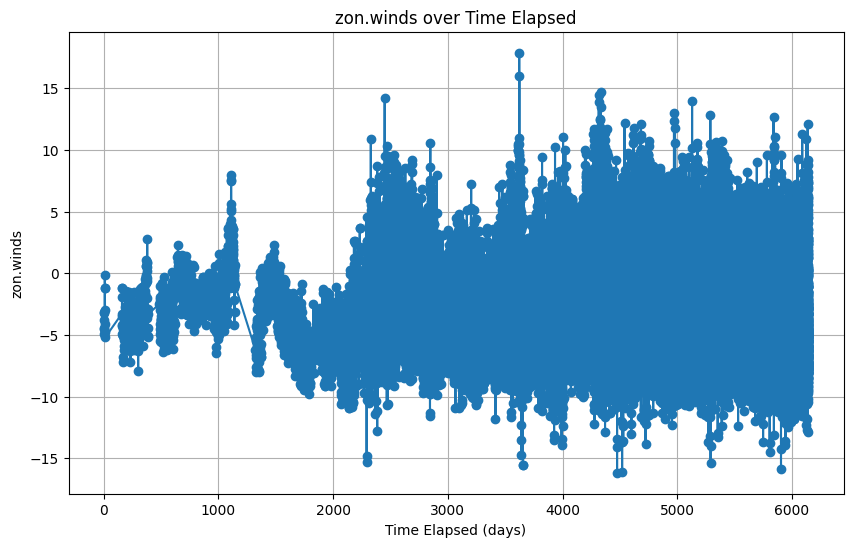

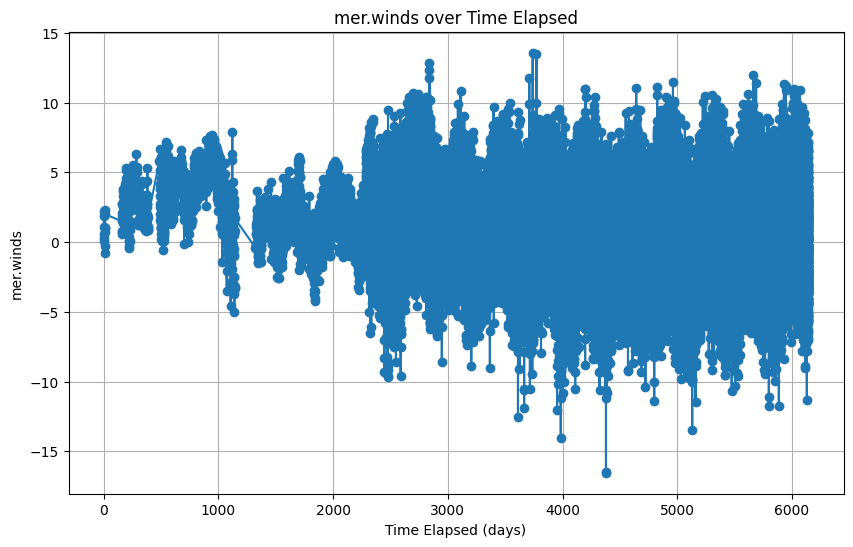

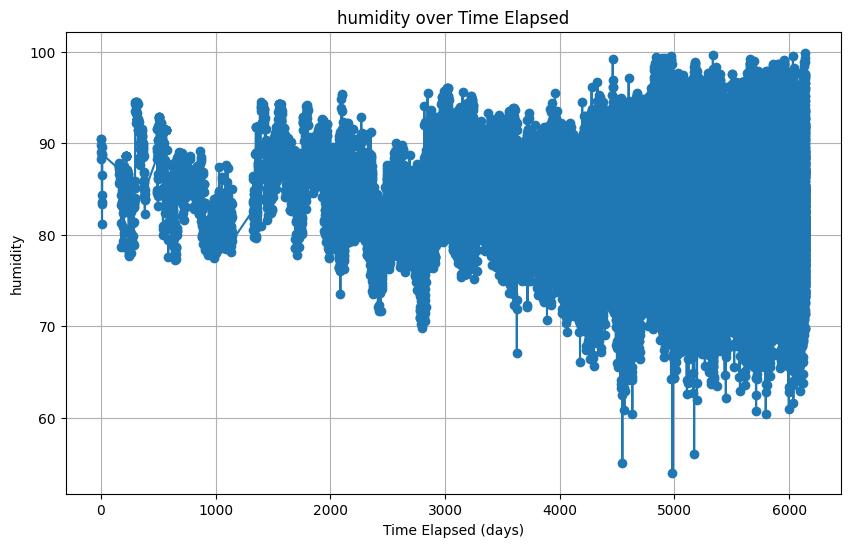

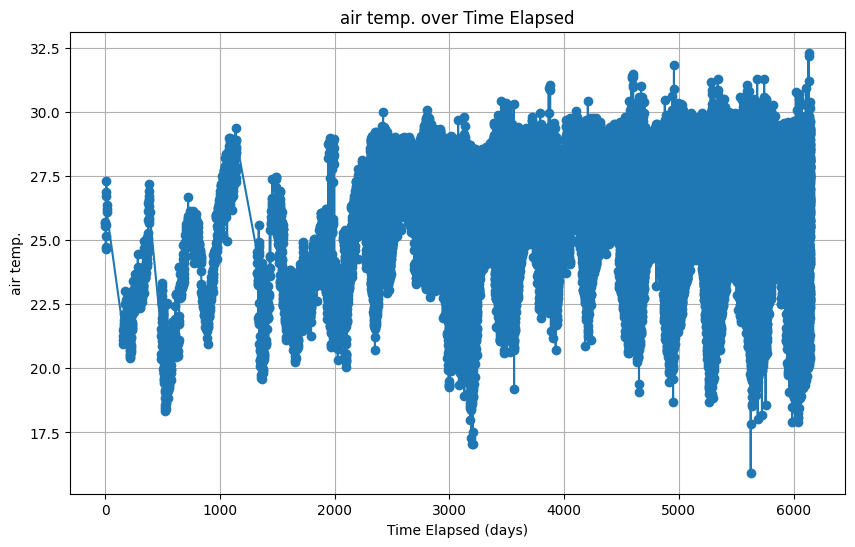

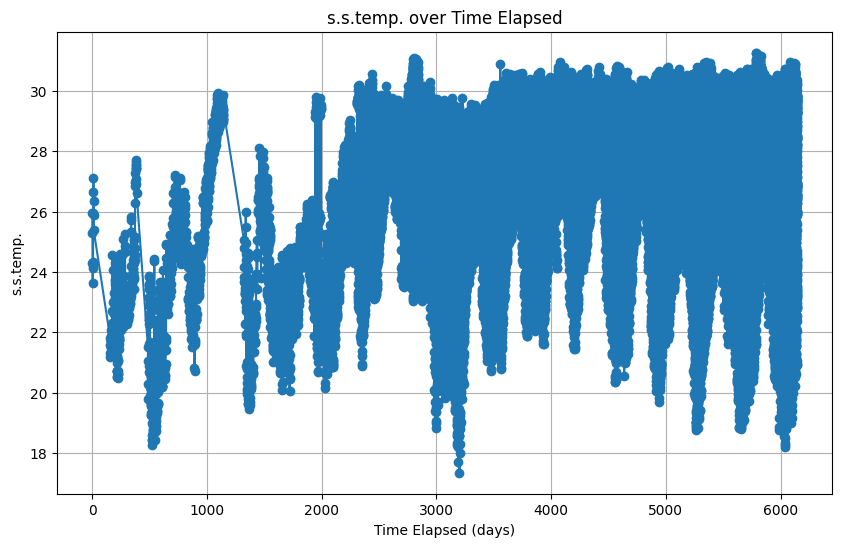

In [65]:
# Plot the features wrt time after imputing
for column in df.columns:
    if column not in ['year', 'month', 'day', 'time_elapsed']:
        plt.figure(figsize=(10, 6))
        if column in ['latitude', 'longitude']:
            plt.scatter(df['time_elapsed'].dropna(), df[column].dropna())  # Corrected scatter plot
        else:
            # Align indices of time_elapsed and column
            aligned_df = df[['time_elapsed', column]].dropna()
            plt.plot(aligned_df['time_elapsed'], aligned_df[column], marker='o')  # Corrected line plot
        plt.title(f'{column} over Time Elapsed')
        plt.xlabel('Time Elapsed (days)')
        plt.ylabel(column)
        plt.grid(True)
        plt.show()


In [68]:
df.shape

(104409, 11)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104409 entries, 0 to 104408
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          104409 non-null  int64  
 1   month         104409 non-null  int64  
 2   day           104409 non-null  int64  
 3   latitude      104409 non-null  float64
 4   longitude     104409 non-null  float64
 5   zon.winds     104409 non-null  float64
 6   mer.winds     104409 non-null  float64
 7   humidity      104409 non-null  float64
 8   air temp.     104409 non-null  float64
 9   s.s.temp.     104409 non-null  float64
 10  time_elapsed  104409 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 8.8 MB


In [70]:
df.to_csv('updated.csv', index=False)